In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Position.csv")

In [3]:
data.head(5)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [7]:
data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [9]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


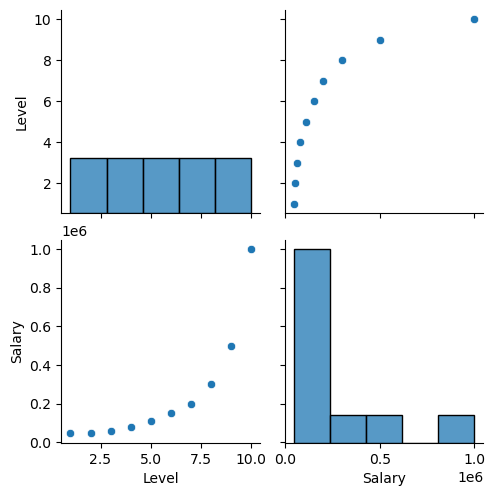

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(data=data)
plt.show()

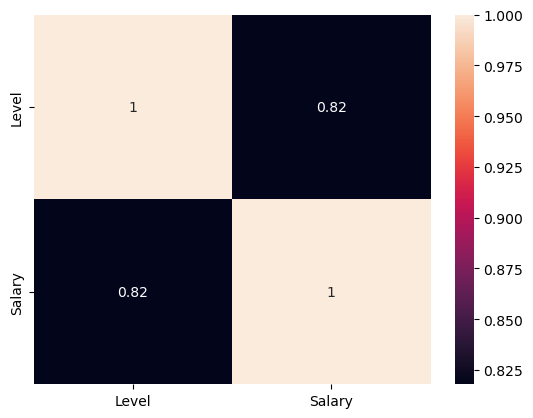

In [12]:
sns.heatmap(data=data.corr(),annot=True)
plt.show()

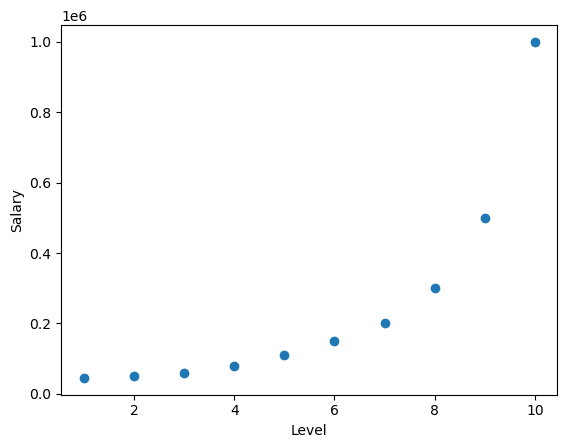

In [15]:
plt.scatter(data["Level"],data["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [18]:
X=data[["Level"]]
Y=data["Salary"]

In [20]:
#we are converting into polynominal feature
from sklearn.preprocessing import PolynomialFeatures

In [22]:
pf = PolynomialFeatures(degree=3)
pf.fit(X)
x = pf.transform(X)

In [24]:
x

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler()

In [67]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression

In [71]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [73]:
lr.score(X_test,Y_test)

0.8451346684575982

In [75]:
pred=lr.predict(X)

C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


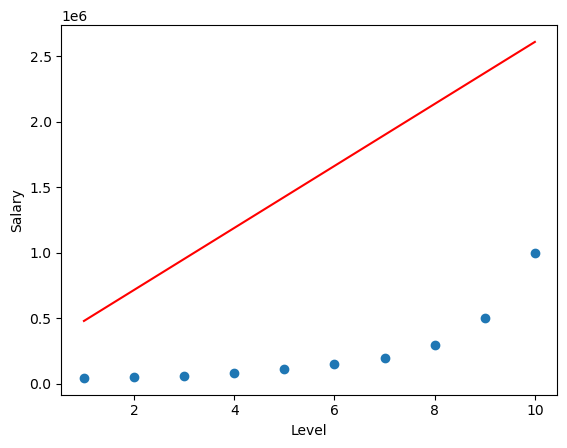

In [77]:
plt.scatter(data["Level"],data["Salary"])
plt.plot(data["Level"],pred,c="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [80]:
lr.coef_       #m1 and m2

array([236645.49658938])

In [43]:
lr.intercept_ #C

-240258.62068965513

In [45]:
#hw too work polynomial euqation work
#Y= m1x1 + m2x2^2 + C
#y= 87887 x1 + 93103448 x2^2 + (-240258.62068965513)

In [47]:
#for new data
test=pf.transform([[16]])
test

C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000e+00, 1.600e+01, 2.560e+02, 4.096e+03]])

In [57]:
lr.predict([[3]])

C:\Users\Utkarsha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23405.17241379])